In [5]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open("O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)

posterior_dict = pickle.load(open("posterior_dict.pkl", "rb"))

print(f"using {len(posterior_dict)} events")


using 69 events


In [6]:
population_model = "PBH-lognormal"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [7]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

17:58 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal_flatLCDM/'
17:58 bilby INFO    : Search parameters:
17:58 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
17:58 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
17:58 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
17:58 bilby INFO    :   H0 = 67.4
17:58 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


17:59 bilby INFO    : Single likelihood evaluation took 7.885e-02 s


0it [00:00, ?it/s]

17:59 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f427b472430>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
17:59 bilby INFO    : Checkpoint every check_point_delta_t = 60s
17:59 bilby INFO    : Using dynesty version 1.0.1
17:59 bilby INFO    : Using the bilby-implemented rwalk sampl

5828it [00:00, 23082.16it/s, bound:511 nc:  1 ncall:1.8e+05 eff:3.2% logz=-1757.02+/-0.18 dlogz:0.100>0.1]

17:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_resume.pickle
17:59 bilby INFO    : Writing 1594 current samples to H0_GWTC-3_PBH-lognormal_flatLCDM//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
17:59 bilby INFO    : Starting to close worker pool.
17:59 bilby INFO    : Finished closing worker pool.


5828it [00:02, 2266.48it/s, bound:511 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1756.94+/-0.18 dlogz:0.000>0.1] 

17:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
17:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
17:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
17:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
17:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


17:59 bilby INFO    : Sampling time: 0:29:54.039232
17:59 bilby INFO    : Summary of results:
nsamples: 6328
ln_noise_evidence:    nan
ln_evidence: -1756.937 +/-  0.179
ln_bayes_factor:    nan +/-  0.179



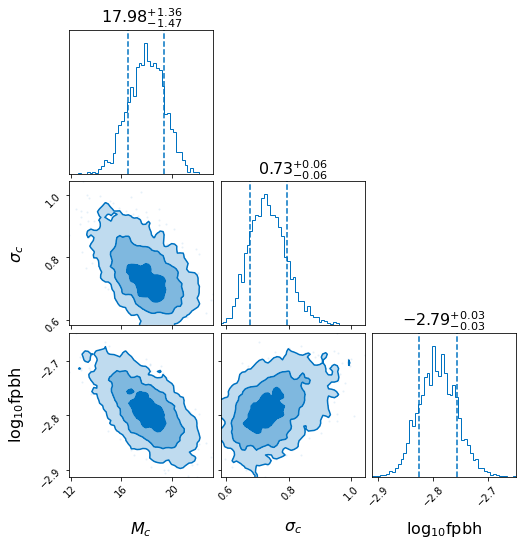

In [8]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
